Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [104]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [105]:
titanic = pd.read_csv('/content/train.csv')

print("Dataframe info:")
print(titanic.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [106]:
print("Dataframe head:")
titanic.head(10)

Dataframe head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

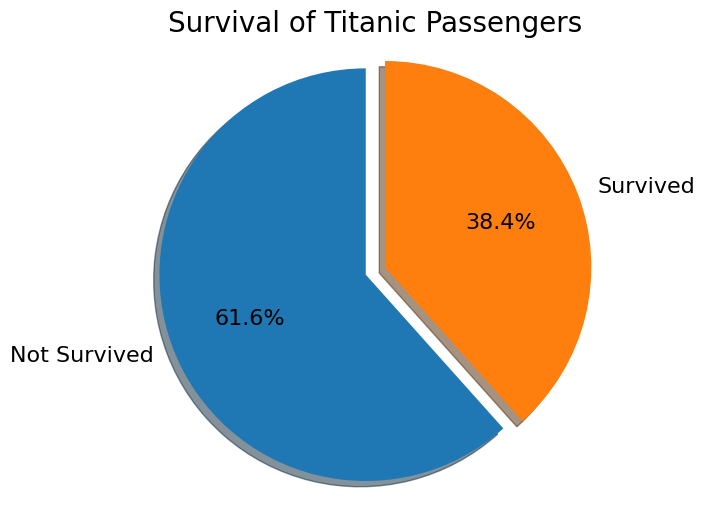

In [108]:
survived_counts = titanic['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survived_counts,
        labels=['Not Survived', 'Survived'],
        explode=(0.05, 0.05),
        shadow=True,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 16})
plt.title('Survival of Titanic Passengers', fontsize = 20)
plt.axis('equal')
plt.show()

На діаграмі зображено співвідношення між загиблими та врятованими пасажирами.
З діаграми видно, що переважна частина пасажирів загинула (61.6%), а врятовано лише 38.4%.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


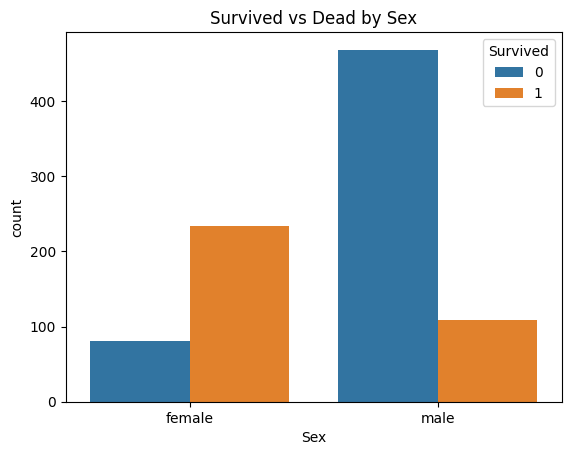

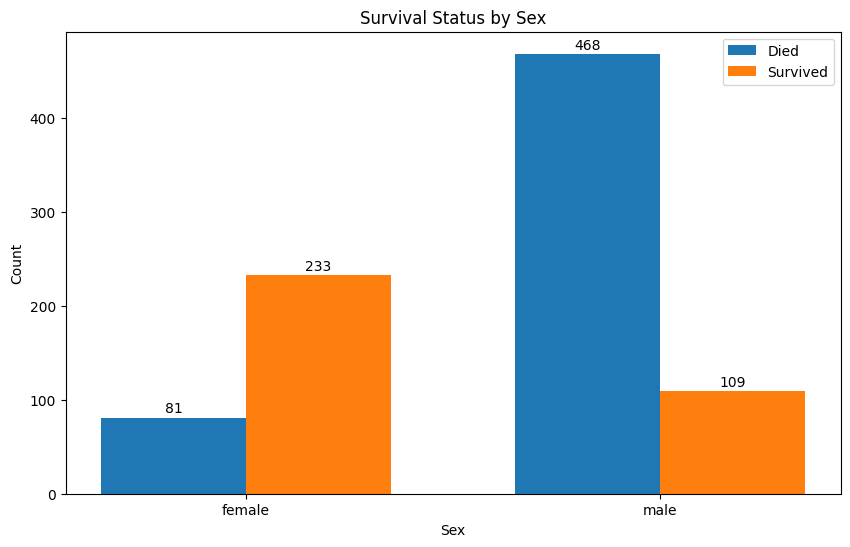

In [110]:
sex_values = sorted(titanic['Sex'].unique())
survived_values = sorted(titanic['Survived'].unique())

survived_gr = titanic.groupby(['Sex', 'Survived'], as_index=False).size()

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#DC143C', '#32CD32']
width = 0.35

for i, survived in enumerate(survived_values):
    survived_data = survived_gr[survived_gr['Survived'] == survived]['size']
    ax.bar([x + i * width for x in range(len(sex_values))], survived_data,
           width, label=f'{"Survived" if survived == 1 else "Died"}')
    for j, count in enumerate(survived_data):
        ax.text(j + i * width, count + 5, str(count), ha='center')

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Survival Status by Sex')
ax.set_xticks([x + width / 2 for x in range(len(sex_values))])
ax.set_xticklabels(sex_values)
ax.legend()

plt.show()

З діаграми видно, що чоловіків загинуло значно більше (468), ніж жінок (81), а серед врятованих навпаки, більше жінок, ніж чоловіків (жінок врятовано 233, а чоловіків - 109).

Порівнявши кількість загиблих та врятованих серед жінок та чоловіків відповідно, можна побачити, що кількість врятованих жінок перевищує кількість загиблих майже в 3 рази, а кількість загиблих чоловіків перевищує кількість врятованих в понад 4 рази.

Також можна зробити висновок, що чоловіків на Титаніку загалом було більше, ніж жінок.

(Коментар: я додав кількісні значення до колонок для полегшення оцінки даних)

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

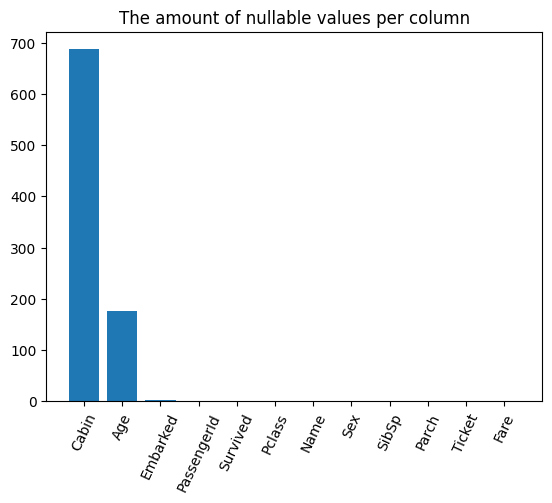

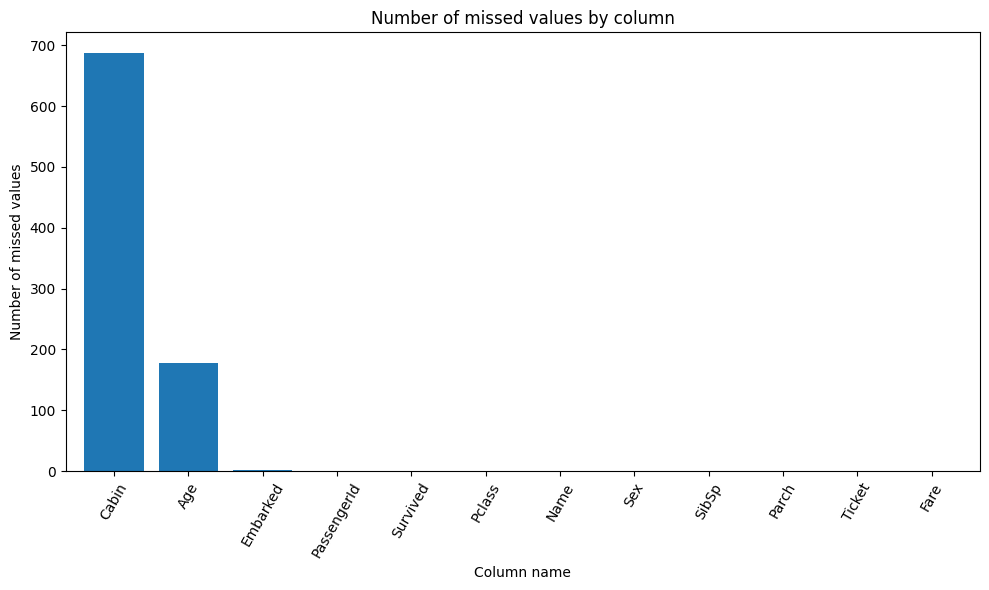

In [109]:
missing_values = titanic.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', width=0.8)
plt.title('Number of missed values by column')
plt.xlabel('Column name')
plt.ylabel('Number of missed values')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Ця діаграма дає нам змогу наочно оцінити, які колонки містять найбільше пропущених значень, щоб звернути на них увагу при подальшій обробці.
Завдяки сортуванню ми легко бачимо, що значну кількість порожніх значень мають колонки Cabin та Age, Embarked містить невелику кількість таких значень.
Тому можна припустити, що колонка Cabin не буде корисною для подальшого аналізу.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

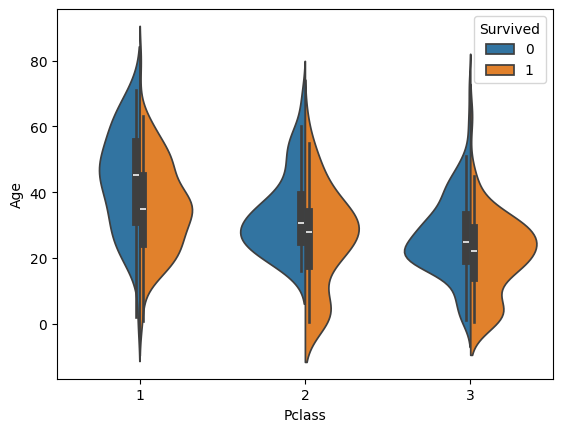

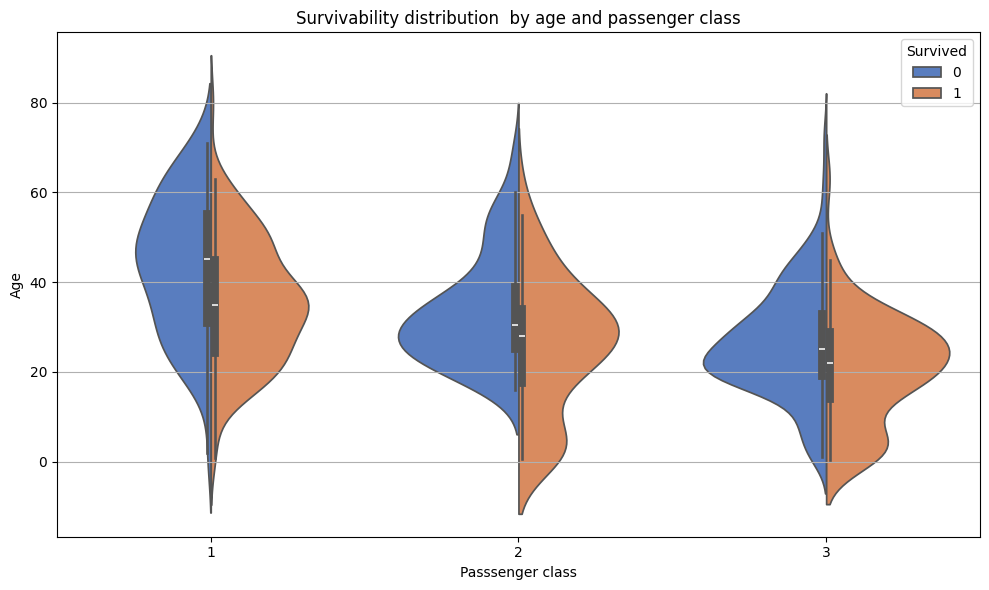

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic,
               split=True, palette='muted')
plt.title('Survivability distribution  by age and passenger class')
plt.xlabel('Passsenger class')
plt.ylabel('Age')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Цей графік (violin plot) дає змогу оцінити розподіл загиблих та врятованих пасажирів за віком та класом, яким вони подорожували.
З цих скрипкових діаграм видно, що першим класом в основному подорожували люди від ~18 до 70 років, основна частка загиблих припадає на людей від 30 до 55 років, а врятованих - від 18 до 50.
Другим класом подорожували люди віком від 0 до 60 років.
Основна частина загиблих тут припадає на діапазон від 20 до 40 років, врятованих - від 20 до 40, але загиблих в цьому діапазоні більше.
Третім класом загалом подорожували пасажири віком від 0 до 65.
Найбільше загиблих припадає на вік від 10 до 35-40 років, врятованих - від 20 до 30.
Міжквартильний діпазон вказує на розмах в діпазоні між квартилями (25% та 75%), тож ми бачимо, що цей діпазан найбільший для загиблих пасажирів 1 класу.
Також можна зробити висновок, що з 2 класу врятовані всі діти.
Помітна тенденція до зростання віку основної частини пасажирів в залежності від класу квитка. 1 класом подорожували люди старшого віку.
Візуально можна оцінити, що найбільше загинуло пасажирів у 3 класі та 2, що дає змогу припустити, що це пов'язано з умовами розміщення пасажирів.

(Коментар: я додав горизонтальну сітку для полегшення оцінки значень на графіках.)

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


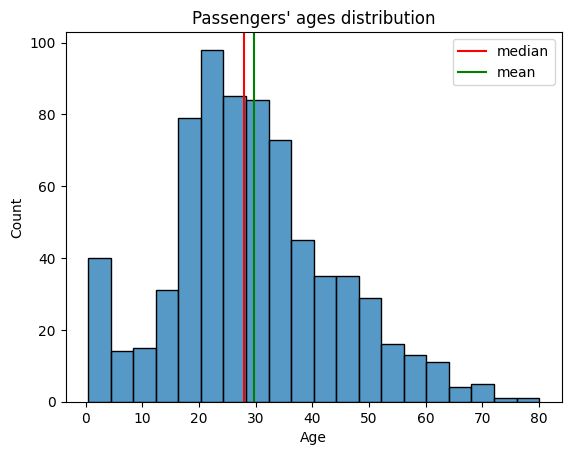

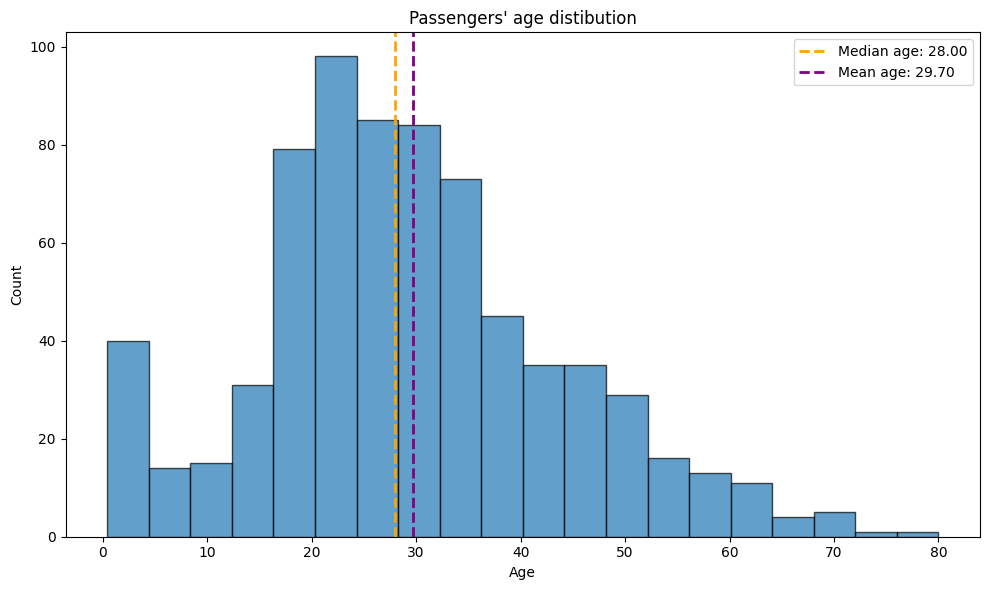

In [113]:
median_age = titanic['Age'].median()
mean_age = titanic['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.axvline(median_age, color='orange', linestyle='dashed', linewidth=2,
            label=f'Median age: {median_age:.2f}')
plt.axvline(mean_age, color='purple', linestyle='dashed', linewidth=2,
            label=f'Mean age: {mean_age:.2f}')
plt.title("Passengers' age distibution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

Ця гістограма показує розподіл пасажирів за віком. Найбільше пасажирів було віком від 20 до 24. Середній вік пасажирів - ~30 років. Найбільше пасажирів було віком 28. Також з гістограми можна побачити, що основна частка пасажирів була віком від 17 до 36 років.
Розглянувши пасажирів від 0 до 15 років, можемо побачити, що найчастіше зустрічаються діти до 5 років.

(Коментар: в легенді я додав числові значення для медіани та середнього значення для полегшення аналізу. Також змінив кольори ліній, тому що червоний та зелений можуть викликати незручності у сприйнятті в людей з дальтонізмом.)

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як відсоток врятованих пасажирів залежить від класу їхнього білета?



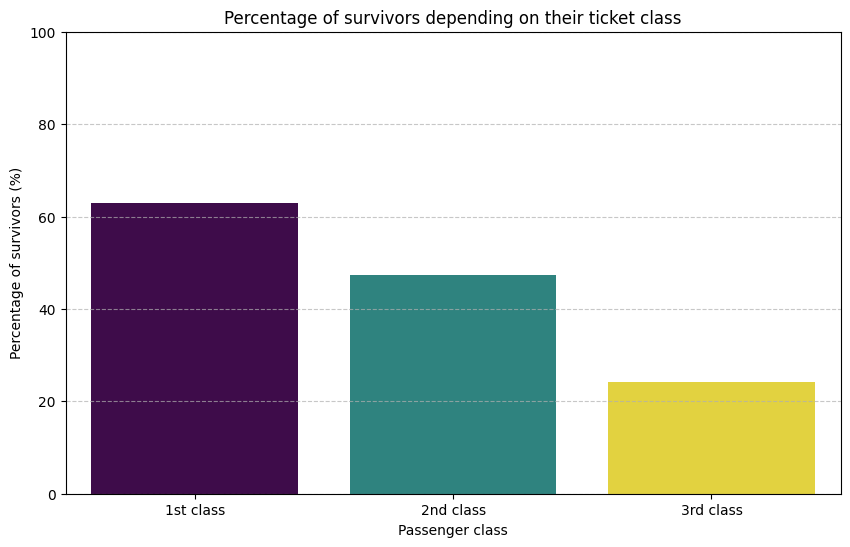

In [128]:
sur_percentage_by_class = titanic.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=sur_percentage_by_class.index,
            y=sur_percentage_by_class.values,
            hue=sur_percentage_by_class.index, palette='viridis',
            legend=False)
plt.title('Percentage of survivors depending on their ticket class')
plt.xlabel('Passenger class')
plt.ylabel('Percentage of survivors (%)')
plt.xticks(ticks=[0, 1, 2], labels=['1st class', '2nd class', '3rd class'])
plt.ylim(0, 100)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

З діаграми можна зробити очевидний висновок, що чим кращий клас білета був, тим більше відсоток врятованих пасажирів. Серед пасажирів 1 класу відсоток врятованих незначно більше 60%, в 2 класу ~50%, в третього - найнижчий, трохи більше за 20%.

Як вік дітей та наявність батьків/опікунів вплинули на виживання дітей на кораблі "Титанік"?

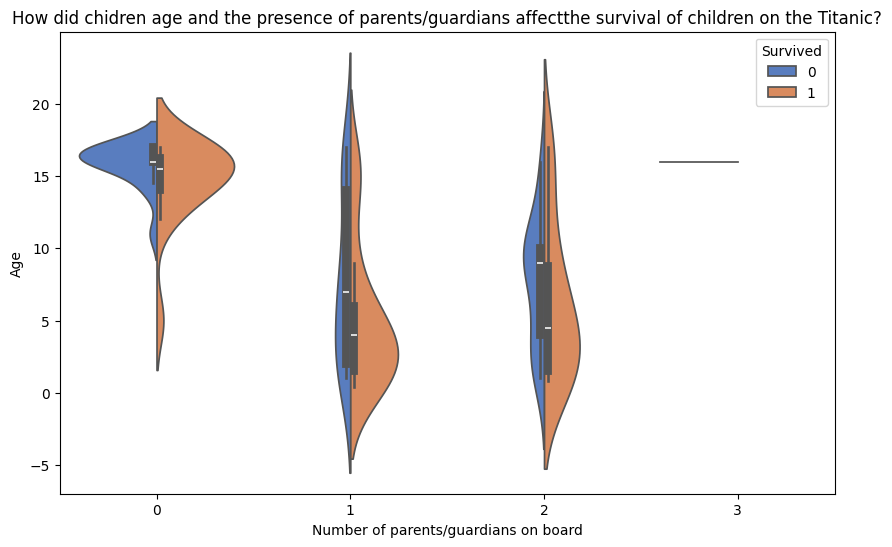

In [129]:
children = titanic[titanic['Age'] < 18]

plt.figure(figsize=(10, 6))
sns.violinplot(x='Parch',
               y='Age',
               hue='Survived',
               split=True,
               data=children,
               palette='muted')
plt.title('How did chidren age and the presence of parents/guardians affect'
          'the survival of children on the Titanic?')
plt.xlabel('Number of parents/guardians on board')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])
plt.show()

Наведені violin plots дають змогу побачити, що без батьків подорожували підлітки віком від 14 до 18. Як бачимо з 2 та 3 графіків, наявність 1 чи 2 батьків з дитиною підвищують шанси на виживання. Втрати серед дітей, які подорожували без батьків, вищі, тому що, ймовірно, нікому було їм допомогти.
Діти, в яких було 3 батьків/опікунів, складають незначну частину, тому немає сенсу їх аналізувати.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

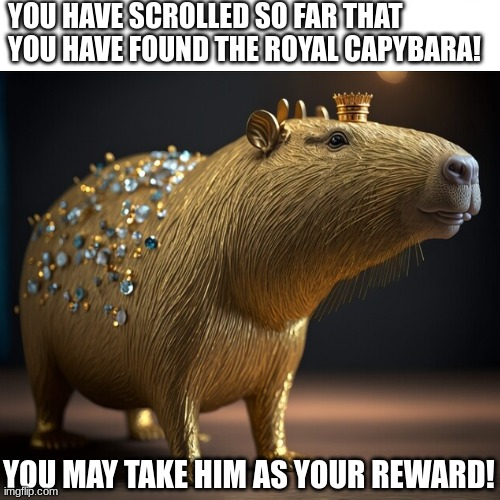